In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [131]:

iris = pd.read_csv("iris.data",names = ["sepal length", "sepal width", "petal length", "petal width", "class"])



,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
#cont = []
#for i in iris["class"]:
#    if i == "Iris-versicolor":
#        cont.append(1)
#    elif i == "Iris-setosa":
#        cont.append(2)
#    elif i == "Iris-virginica":
#        cont.append(3)
#iris["class"] = cont


In [135]:
#target = iris.pop("class")

In [136]:
from sklearn.model_selection import train_test_split
def split(Xdata,ratio):
    x_train, x_test,  = train_test_split(Xdata, test_size=ratio,random_state=0)
    return x_train,x_test,

x_train,x_test = split(iris,0.3)
print(x_train.shape)
print(x_test.shape)

(105, 5)
(45, 5)


In [160]:
x_test.head()

,sepal length,sepal width,petal length,petal width,class
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


In [137]:
import math

def eucli_dist(X, Y, number):
    distance = []
    for i in range(len(X)):
        distance.append(0)
    distance = np.asarray(distance)
    for i in (number):
        distance =+ (np.subtract(X[i] , Y[i]))**2
    return np.sqrt(distance)

In [138]:
import operator
from collections import Counter
def Neigbours(x_train,x_test,K,label):
    
    dists = []
    for i in range(len(x_train)):
        dista = eucli_dist(x_test,x_train.iloc[[i]],label)
        dists.append(dista)
        dists = list(dists)
 
    dists = np.asarray(dists)
    dists = dists.reshape(len(x_train),len(x_test))
    dists = pd.DataFrame(data=dists)

    index_cont = []
    for i in range(len(x_test)):
        neigbour_index = dists.nsmallest(K, i).index
        index_cont.append(neigbour_index)


   
    return index_cont

In [139]:
def Accuracy(data,predictions,target):
    count = 0
    for x in range(len(data)):
        if data[target].iloc[x] is predictions[x][0]:
            count += 1
    accuracy = (count/float(len(data)))*100
    return accuracy

In [140]:
def mode(lst):
    d = {}
    for a in lst:
        if not a in d:
            d[a]=1
        else:
            d[a]+=1
    return [k for k,v in d.items() if v==max(d.values())]

In [141]:
def predict(x_train,x_test,K,label,target):
    neigbours = Neigbours(x_train,x_test,K,label)
    pred_class = {}
    val = []
    for neigb, no in zip(neigbours,range(len(neigbours))):
        prediction = []
        for d in neigb:
            prediction.append(x_train[target].iloc[d])
        reult = mode(prediction)
        val.append(reult)
        pred_class[no] ="prediction is :", reult, "nearest neigbour is :", prediction
    return pred_class, val

In [158]:
K = 5
query = x_test
label1 = ["sepal length", "sepal width", "petal length", "petal width"]

target1 = "class"
prediction , value = predict(x_train,query,K,label1,target1)
accuracy = Accuracy(query,value,target1)
print("predictions for the querry", value)
print("accuracy is : ",accuracy , "percent")

predictions for the querry [['Iris-virginica'], ['Iris-versicolor'], ['Iris-setosa'], ['Iris-virginica'], ['Iris-setosa'], ['Iris-virginica'], ['Iris-setosa'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-setosa'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-setosa'], ['Iris-setosa'], ['Iris-virginica'], ['Iris-versicolor'], ['Iris-setosa'], ['Iris-setosa'], ['Iris-virginica'], ['Iris-setosa'], ['Iris-setosa'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-setosa'], ['Iris-virginica'], ['Iris-versicolor'], ['Iris-setosa'], ['Iris-virginica'], ['Iris-virginica'], ['Iris-versicolor'], ['Iris-setosa'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-versicolor'], ['Iris-virginica'], ['Iris-setosa'], ['Iris-virginica'], ['Iris-setosa'], ['Iris-setosa']]
accuracy is :  97.77777777777777 percent


In [144]:
def cross_valid(data,label,target):
        
    Acuracy = []
    K_fold = []      
    
    for ka in range(1,50):
        x_train1, x_val = split(data,0.3)    
        prediction , value = predict(x_train1,x_val,ka,label,target)
        accuracy = Accuracy(x_val,value,target)
        Acuracy.append(accuracy)
        K_fold.append(ka)          
    
    return K_fold, Acuracy
    

In [145]:
label = ["sepal length", "sepal width", "petal length", "petal width"]

target = "class"
num_k, acc = cross_valid(iris,label,target)

In [146]:
parameters = {'K_fold': num_k , 'Accuracy': acc}
parameters1 = pd.DataFrame(data=parameters)
parameters1

,K_fold,Accuracy
0,1,82.222222
1,2,82.222222
2,3,82.222222
3,4,82.222222
4,5,97.777778
5,6,97.777778
6,7,95.555556
7,8,97.777778
8,9,97.777778
9,10,97.777778


In [152]:
label = ["sepal length", "sepal width", "petal length", "petal width"]

target = "class"
kays = [x for x in range(1,10)]
Ac = []
for i in kays:
    prediction , value = predict(x_train,x_test,i,label,target)
    accuracy = Accuracy(x_test,value,target)
    Ac.append(accuracy)


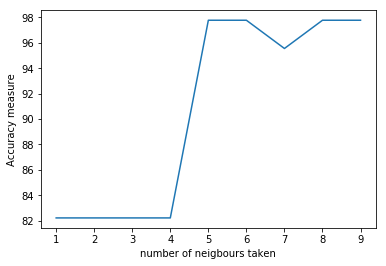

In [154]:
plt.plot(kays,Ac)
plt.ylabel("Accuracy measure")
plt.xlabel("number of neigbours taken")
plt.show()